# Factors which influence home price across the U.S are based on the supply and demand and the macro & micro economic factors which influence the market growth rate

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,  RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
%matplotlib inline

#Data is fetched from FRED website to access the U.S house price details
Categories are choosed based on MECE Framework

#Macro economic factors affecting the house price
U.S Housing market factors

In [ ]:
df=pd.read_csv('house_dataset.csv')
df

,sr_no,date,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,1,01-01-2000,100.552,281083,4.3,1727,8.15,101.488,17.087,74.248,142.4,103.091,1.48,4.6669
1,2,01-02-2000,101.339,281299,4.3,1692,8.25,101.547,17.087,74.270,142.7,103.151,1.48,4.6801
2,3,01-03-2000,102.127,281531,4.3,1651,8.27,101.620,17.087,74.227,143.2,103.059,1.48,4.7108
3,4,01-04-2000,102.922,281763,4.4,1597,8.23,101.690,16.594,74.505,143.2,103.038,1.44,4.7668
4,5,01-05-2000,103.677,281996,4.4,1543,8.13,101.731,16.594,74.089,142.2,103.009,1.44,4.7546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,249,01-09-2020,225.954,330535,3.5,1589,4.45,95.949,2.688,66.959,231.9,98.867,1.00,18.6050
249,250,01-10-2020,229.442,330692,3.5,1595,4.41,96.081,2.744,67.837,231.8,99.034,1.13,18.7511
250,251,01-11-2020,232.656,330829,4.0,1696,4.41,96.210,2.744,67.879,230.7,98.986,1.13,18.9602
251,252,01-12-2020,235.583,330924,3.8,1758,4.08,96.451,2.744,68.025,234.3,98.989,1.13,19.1314


In [ ]:
df = df.drop(columns=["sr_no","date"],axis=1)

In [ ]:
df.shape

(253, 12)

In [ ]:
df.describe()

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,161.977692,308360.885375,5.759289,1324.134387,5.241976,99.847209,8.829372,69.917617,188.081423,99.838901,2.592292,9.560492
std,30.992113,14854.486233,1.917019,470.409385,1.277572,1.437940,7.061953,2.358979,30.054525,1.596926,2.406876,3.594104
min,100.552000,281083.000000,3.500000,513.000000,3.310000,90.834000,2.293000,60.290000,140.100000,96.160000,0.680000,4.666900
25%,140.358000,295359.000000,4.300000,1003.000000,4.100000,99.614000,2.614000,67.812000,160.700000,98.627000,1.020000,6.455700
50%,161.991000,309847.000000,5.300000,1302.000000,5.030000,100.012000,5.199000,70.581000,192.200000,100.176000,1.510000,8.619400
75%,183.068000,321641.000000,6.600000,1665.000000,6.220000,100.535000,16.048000,71.670000,211.600000,101.039000,3.280000,12.196500
max,238.530000,330968.000000,12.200000,2263.000000,8.620000,101.814000,21.774000,74.505000,240.600000,103.151000,8.920000,19.396500


In [ ]:
df.isnull().sum()

target_home_price        0
population               0
monthly_supply_houses    0
new_permits_thousands    0
mortgage_rate            0
gdp_monthly              0
hcai                     0
employment_percentage    0
ppi_const_goods          0
cci_real_estate          0
deliquency_rate          0
m3_trillion              0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index) 
data

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,0.000000,0.000000,0.091954,0.693714,0.911488,0.970310,0.759407,0.981921,0.022886,0.991418,0.097087,0.000000
1,0.005704,0.004330,0.091954,0.673714,0.930320,0.975683,0.759407,0.983468,0.025871,1.000000,0.097087,0.000896
2,0.011415,0.008981,0.091954,0.650286,0.934087,0.982332,0.759407,0.980443,0.030846,0.986840,0.097087,0.002980
3,0.017177,0.013631,0.103448,0.619429,0.926554,0.988707,0.734100,1.000000,0.030846,0.983836,0.092233,0.006782
4,0.022649,0.018302,0.103448,0.588571,0.907721,0.992441,0.734100,0.970735,0.020896,0.979688,0.092233,0.005954
...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.908855,0.991320,0.000000,0.614857,0.214689,0.465847,0.020276,0.469152,0.913433,0.387212,0.038835,0.946265
249,0.934134,0.994467,0.000000,0.618286,0.207156,0.477869,0.023151,0.530918,0.912438,0.411100,0.054612,0.956183
250,0.957428,0.997214,0.057471,0.676000,0.207156,0.489617,0.023151,0.533873,0.901493,0.404234,0.054612,0.970379
251,0.978642,0.999118,0.034483,0.711429,0.145009,0.511566,0.023151,0.544144,0.937313,0.404663,0.054612,0.982002


In [ ]:
corr_features=df.corr()

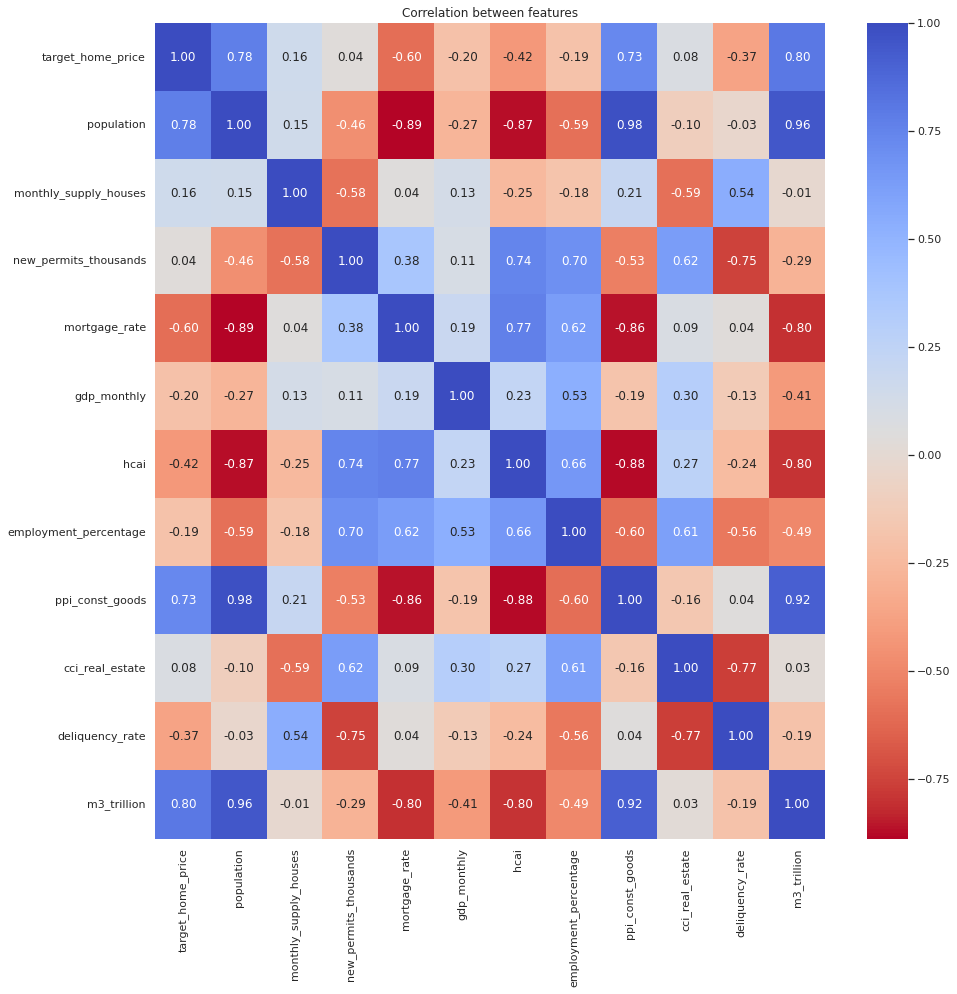

In [ ]:
# Plotting Correlation between Features.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_features,fmt='.2f',cmap='coolwarm_r',annot=True) 
plt.title("Correlation between features")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="target_home_price", axis=1), data["target_home_price"], 
                                                    test_size= 0.30, random_state=42)

#Linear Regression Model

In [ ]:
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=15).mean()
cross_val_linear_model

0.9679914889051601

#Knn regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_values=np.arange(1,15)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train,y_train)
  print("K value : ", k, "cross_val_score : ", cross_val_score(knn_regressor,X_train,y_train,cv = 15).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train,y_train,cv = 15).mean())

K value :  1 cross_val_score :  0.99468917529749
K value :  2 cross_val_score :  0.9937640442235955
K value :  3 cross_val_score :  0.993545508553563
K value :  4 cross_val_score :  0.9922882857627595
K value :  5 cross_val_score :  0.9912638104563385
K value :  6 cross_val_score :  0.9892970284285132
K value :  7 cross_val_score :  0.9880213545136569
K value :  8 cross_val_score :  0.9860467365804408
K value :  9 cross_val_score :  0.9835800144844986
K value :  10 cross_val_score :  0.981106941322929
K value :  11 cross_val_score :  0.9773079463833894
K value :  12 cross_val_score :  0.974857402479162
K value :  13 cross_val_score :  0.9715054817793257
K value :  14 cross_val_score :  0.9674231753446114


In [ ]:
cross_val_knn_regressor=max(cross_val_knn)
print("The best K-Value is 11 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 11 and Cross_val_score is 0.99468917529749


In [ ]:
#Implementing knn regressor
knn_regressor=KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(X_train,y_train)
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train,y_train,cv=15).mean()
cross_val_knn_regressor

0.9773079463833894

In [ ]:
from sklearn.tree import DecisionTreeRegressor
max_depth=np.arange(1,15)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.45866563341226724
Depth :  2 cross_val_score :  0.7659729338194772
Depth :  3 cross_val_score :  0.8952523738883754
Depth :  4 cross_val_score :  0.9323262366771436
Depth :  5 cross_val_score :  0.9359355245881643
Depth :  6 cross_val_score :  0.9565148270526921
Depth :  7 cross_val_score :  0.9592951514713643
Depth :  8 cross_val_score :  0.9423703889726446
Depth :  9 cross_val_score :  0.9391333345455304
Depth :  10 cross_val_score :  0.9384674281918007
Depth :  11 cross_val_score :  0.937248057150363
Depth :  12 cross_val_score :  0.9361846794714378
Depth :  13 cross_val_score :  0.9358459719285095
Depth :  14 cross_val_score :  0.9357602601815098


In [ ]:
cross_val_dt_regressor=max(cross_val_dt)
print("The best depth is 11 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 11 and Cross_val_score is: 0.9592951514713643


In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=11, random_state=0)
dt_regressor.fit(X_train,y_train)
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.937248057150363

#Extreme Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(X_train,y_train) 
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

[15:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)
print("The best Learning rate is 0.09 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.09 and Cross_val_score is: 0.9937116120990731


In [ ]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.12,n_estimators=1000) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

[15:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.992283918870347

In [ ]:
xgb_regressor.feature_importances_

array([0.3612031 , 0.00287747, 0.03260578, 0.03405388, 0.05625238,
       0.00653021, 0.01347893, 0.07750349, 0.00046135, 0.22834818,
       0.18668523], dtype=float32)

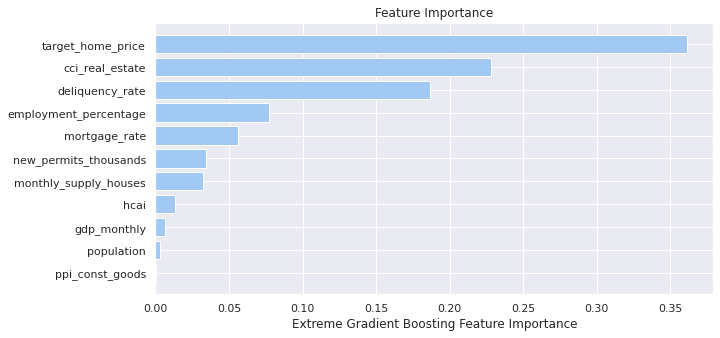

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

Based on the feature importance given by Best Machine Learning Algorithm(Extreme Gradient Boosting)-Sellers should Focus on the features of order given below to build homes that fetch more money:
1. target_home_price
2. ccl_real_estate
3. deliquency_rate
4. employment_percentage
5. mortage_rate
6. new_permits_thousands
7. monthly_supply_houses
8. hcai
9. gdp_monthly
10. population



These are the important factors influencing the home price across United States

#Micro economic factors affecting the house price

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score,  RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_style("darkgrid")
%matplotlib inline

In [ ]:
df1=pd.read_csv('USA_Housing.csv')
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
df1.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
df1.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [ ]:
corr_features=df1.corr()

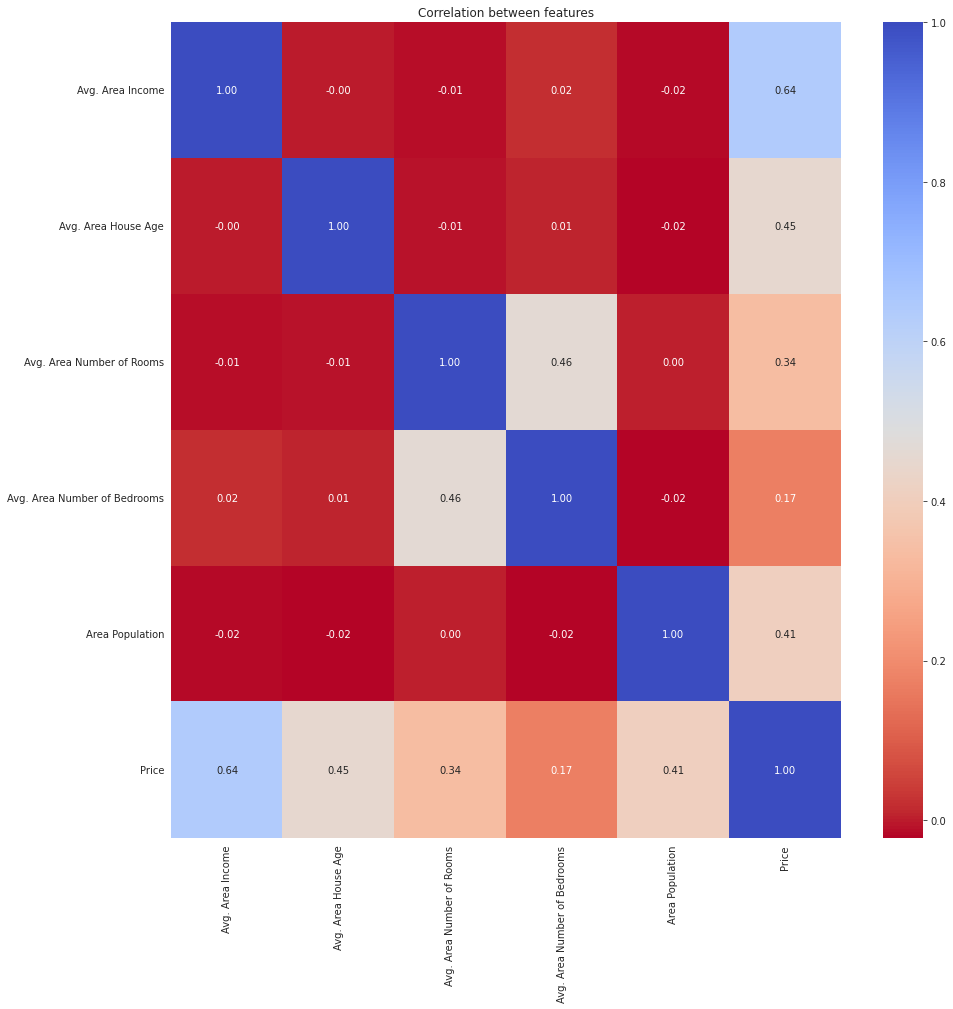

In [ ]:
# Plotting Correlation between Features.
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_features,fmt='.2f',cmap='coolwarm_r',annot=True) 
plt.title("Correlation between features")
plt.show()

In [ ]:
df1=df1.drop(['Address'],axis=1)

In [ ]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index) 
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702
...,...,...,...,...,...,...
4995,0.475738,0.754359,0.385619,0.324444,0.326351,0.425683
4996,0.675097,0.633450,0.444024,0.448889,0.366362,0.597881
4997,0.507135,0.670026,0.208534,0.028889,0.476515,0.413672
4998,0.558419,0.420389,0.517579,0.764444,0.611282,0.482127


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns="Price", axis=1), data["Price"], 
                                                    test_size= 0.30, random_state=42)

#Linear Regression

In [ ]:
linear_model=LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=15).mean()
cross_val_linear_model

0.9182301243179636

#Extreme gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(X_train,y_train) 
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

[14:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)
print("The best Learning rate is 0.09 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.09 and Cross_val_score is: 0.9053010902395411


In [ ]:
xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate =0.12,n_estimators=1000) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

[14:26:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.899143799058067

#Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
max_depth=np.arange(1,20)
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  1 cross_val_score :  0.29638597512639725
Depth :  2 cross_val_score :  0.461944570730506
Depth :  3 cross_val_score :  0.5989924135512616
Depth :  4 cross_val_score :  0.6899653406509472
Depth :  5 cross_val_score :  0.7668622552059035
Depth :  6 cross_val_score :  0.818375803146197
Depth :  7 cross_val_score :  0.8505816231901103
Depth :  8 cross_val_score :  0.8675179188100705
Depth :  9 cross_val_score :  0.8759927462576497
Depth :  10 cross_val_score :  0.8797879019629129
Depth :  11 cross_val_score :  0.8812574235200015
Depth :  12 cross_val_score :  0.8813715411333001
Depth :  13 cross_val_score :  0.8815018664658033
Depth :  14 cross_val_score :  0.8813783179809694
Depth :  15 cross_val_score :  0.8813549126793185
Depth :  16 cross_val_score :  0.8810454074900929
Depth :  17 cross_val_score :  0.881100710987955
Depth :  18 cross_val_score :  0.8812762817280217
Depth :  19 cross_val_score :  0.8812539457049592


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)
print("The best depth is 17 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 17 and Cross_val_score is: 0.8815018664658033


In [ ]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.8812762817280217

Feature: 0, Score: 0.79257
Feature: 1, Score: 0.46406
Feature: 2, Score: 0.36749
Feature: 3, Score: 0.00433
Feature: 4, Score: 0.43079


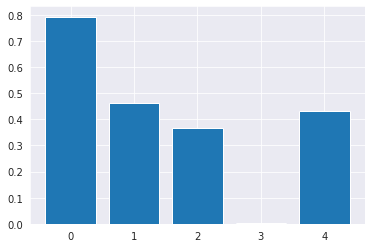

In [ ]:
importance = linear_model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
xgb_regressor.feature_importances_ 

array([0.43263534, 0.23472135, 0.1160805 , 0.03476702, 0.18179572],
      dtype=float32)

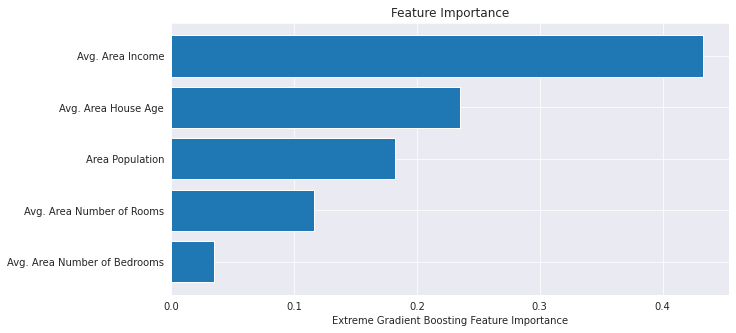

In [ ]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

This factors influence the micro economic factors of house price which focus only on a particular city or area of the United States